# imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import wbdata
import matplotlib.pyplot as plt
import scipy.stats as st
from sympy import *
import time as dt
import warnings
from IPython.display import Math,Latex
from pandas.errors import SettingWithCopyWarning

from sklearn.linear_model import LinearRegression
from statsmodels.api import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler

from scipy.stats import jarque_bera, kstest, kstwobign

from country_dict import *

In [2]:
X = np.array([[ 1.00000000e+00, -1.24817494e+00,  1.55794067e+00,
        -1.94458250e+00,  2.42717914e+00, -3.02954416e+00,
         3.78140109e+00, -4.71985007e+00,  5.89119856e+00,
        -7.35324639e+00,  9.17813784e+00],
       [ 1.00000000e+00, -1.19421216e+00,  1.42614267e+00,
        -1.70311691e+00,  2.03388292e+00, -2.42888771e+00,
         2.90060722e+00, -3.46394040e+00,  4.13667973e+00,
        -4.94007322e+00,  5.89949549e+00],
       [ 1.00000000e+00, -1.16183448e+00,  1.34985935e+00,
        -1.56831313e+00,  1.82212026e+00, -2.11700213e+00,
         2.45960606e+00, -2.85765512e+00,  3.32012223e+00,
        -3.85743247e+00,  4.48169803e+00],
       [ 1.00000000e+00, -1.10607292e+00,  1.22339729e+00,
        -1.35316661e+00,  1.49670094e+00, -1.65546037e+00,
         1.83105988e+00, -2.02528574e+00,  2.24011370e+00,
        -2.47772910e+00,  2.74054904e+00],
       [ 1.00000000e+00, -1.04473522e+00,  1.09147167e+00,
        -1.14029890e+00,  1.19131042e+00, -1.24460395e+00,
         1.30028158e+00, -1.35844995e+00,  1.41922051e+00,
        -1.48270965e+00,  1.54903899e+00],
       [ 1.00000000e+00, -9.85376126e-01,  9.70966110e-01,
        -9.56766824e-01,  9.42775186e-01, -9.28988160e-01,
         9.15402755e-01, -9.02016020e-01,  8.88825051e-01,
        -8.75826986e-01,  8.63019002e-01],
       [ 1.00000000e+00, -9.33751732e-01,  8.71892297e-01,
        -8.14130942e-01,  7.60196178e-01, -7.09834497e-01,
         6.62809191e-01, -6.18899230e-01,  5.77898228e-01,
        -5.39613472e-01,  5.03865014e-01],
       [ 1.00000000e+00, -8.31582195e-01,  6.91528946e-01,
        -5.75063159e-01,  4.78212284e-01, -3.97672820e-01,
         3.30697637e-01, -2.75002266e-01,  2.28686988e-01,
        -1.90172027e-01,  1.58143672e-01],
       [ 1.00000000e+00, -7.90750355e-01,  6.25286124e-01,
        -4.94445225e-01,  3.90982737e-01, -3.09169738e-01,
         2.44476080e-01, -1.93319547e-01,  1.52867501e-01,
        -1.20880030e-01,  9.55859270e-02],
       [ 1.00000000e+00, -7.54055640e-01,  5.68599908e-01,
        -4.28755967e-01,  3.23305855e-01, -2.43790604e-01,
         1.83831680e-01, -1.38619315e-01,  1.04526676e-01,
        -7.88189296e-02,  5.94338584e-02],
       [ 1.00000000e+00, -7.18080411e-01,  5.15639477e-01,
        -3.70270607e-01,  2.65884070e-01, -1.90926142e-01,
         1.37100323e-01, -9.84490560e-02,  7.06943386e-02,
        -5.07642197e-02,  3.64527917e-02],
       [ 1.00000000e+00, -6.75629754e-01,  4.56475564e-01,
        -3.08408473e-01,  2.08369941e-01, -1.40780932e-01,
         9.51157864e-02, -6.42630553e-02,  4.34180323e-02,
        -2.93345144e-02,  1.98192708e-02],
       [ 1.00000000e+00, -6.36416865e-01,  4.05026426e-01,
        -2.57765648e-01,  1.64046406e-01, -1.04401899e-01,
         6.64431294e-02, -4.22855281e-02,  2.69112232e-02,
        -1.71267563e-02,  1.08997566e-02],
       [ 1.00000000e+00, -5.96124510e-01,  3.55364431e-01,
        -2.11841447e-01,  1.26283879e-01, -7.52809153e-02,
         4.48767987e-02, -2.67521596e-02,  1.59476181e-02,
        -9.50676599e-03,  5.66721622e-03],
       [ 1.00000000e+00, -5.48997112e-01,  3.01397829e-01,
        -1.65466537e-01,  9.08406511e-02, -4.98712551e-02,
         2.73791750e-02, -1.50310880e-02,  8.25202389e-03,
        -4.53033728e-03,  2.48714208e-03],
       [ 1.00000000e+00, -4.81933529e-01,  2.32259926e-01,
        -1.11933846e-01,  5.39446734e-02, -2.59977468e-02,
         1.25291859e-02, -6.03823476e-03,  2.91002779e-03,
        -1.40243996e-03,  6.75882840e-04],
       [ 1.00000000e+00, -4.03927820e-01,  1.63157684e-01,
        -6.59039275e-02,  2.66204298e-02, -1.07527322e-02,
         4.34332766e-03, -1.75439088e-03,  7.08647282e-04,
        -2.86242352e-04,  1.15621249e-04],
       [ 1.00000000e+00, -2.95217736e-01,  8.71535118e-02,
        -2.57292625e-02,  7.59573462e-03, -2.24239558e-03,
         6.61994947e-04, -1.95432650e-04,  5.76951844e-05,
        -1.70326417e-05,  5.02833793e-06],
       [ 1.00000000e+00, -1.41695862e-01,  2.00777174e-02,
        -2.84492947e-03,  4.03114735e-04, -5.71196899e-05,
         8.09362371e-06, -1.14683299e-06,  1.62501489e-07,
        -2.30257886e-08,  3.26265897e-09],
       [ 1.00000000e+00,  4.58497785e-02,  2.10220219e-03,
         9.63855048e-05,  4.41925405e-06,  2.02621819e-07,
         9.29016553e-09,  4.25952032e-10,  1.95298063e-11,
         8.95437294e-13,  4.10556016e-14],
       [ 1.00000000e+00,  2.01967382e-01,  4.07908234e-02,
         8.23841582e-03,  1.66389128e-03,  3.36051765e-04,
         6.78714952e-05,  1.37078282e-05,  2.76853418e-06,
         5.59153600e-07,  1.12930789e-07],
       [ 1.00000000e+00,  3.82819692e-01,  1.46550916e-01,
         5.61025766e-02,  2.14771711e-02,  8.22188401e-03,
         3.14749910e-03,  1.20492464e-03,  4.61268877e-04,
         1.76582809e-04,  6.75993766e-05],
       [ 1.00000000e+00,  5.92071031e-01,  3.50548105e-01,
         2.07549378e-01,  1.22883974e-01,  7.27560413e-02,
         4.30767444e-02,  2.55044924e-02,  1.51004711e-02,
         8.94055151e-03,  5.29344155e-03],
       [ 1.00000000e+00,  7.45249843e-01,  5.55397328e-01,
         4.13909771e-01,  3.08466192e-01,  2.29884381e-01,
         1.71321299e-01,  1.27677171e-01,  9.51513916e-02,
         7.09115596e-02,  5.28468286e-02],
       [ 1.00000000e+00,  8.65530023e-01,  7.49142221e-01,
         6.48405084e-01,  5.61214068e-01,  4.85747625e-01,
         4.20429154e-01,  3.63894055e-01,  3.14961230e-01,
         2.72608401e-01,  2.35950756e-01],
       [ 1.00000000e+00,  9.92772877e-01,  9.85597986e-01,
         9.78474949e-01,  9.71403390e-01,  9.64382939e-01,
         9.57413225e-01,  9.50493882e-01,  9.43624546e-01,
         9.36804856e-01,  9.30034453e-01],
       [ 1.00000000e+00,  1.08259136e+00,  1.17200406e+00,
         1.26880147e+00,  1.37359351e+00,  1.48704047e+00,
         1.60985717e+00,  1.74281747e+00,  1.88675914e+00,
         2.04258915e+00,  2.21128937e+00],
       [ 1.00000000e+00,  1.19242753e+00,  1.42188342e+00,
         1.69549294e+00,  2.02175247e+00,  2.41079331e+00,
         2.87469632e+00,  3.42786704e+00,  4.08748304e+00,
         4.87402731e+00,  5.81192437e+00],
       [ 1.00000000e+00,  1.30052304e+00,  1.69136017e+00,
         2.19965286e+00,  2.86069921e+00,  3.72040523e+00,
         4.83847270e+00,  6.29254520e+00,  8.18359999e+00,
         1.06429603e+01,  1.38414150e+01],
       [ 1.00000000e+00,  1.49965549e+00,  2.24896659e+00,
         3.37267510e+00,  5.05785073e+00,  7.58503363e+00,
         1.13749373e+01,  1.70584872e+01,  2.55818541e+01,
         3.83639679e+01,  5.75327352e+01],
       [ 1.00000000e+00,  1.66414865e+00,  2.76939072e+00,
         4.60867782e+00,  7.66952496e+00,  1.27632296e+01,
         2.12399113e+01,  3.53463696e+01,  5.88216131e+01,
         9.78879079e+01,  1.62900030e+02],
       [ 1.00000000e+00,  1.88991333e+00,  3.57177239e+00,
         6.75034024e+00,  1.27575580e+01,  2.41106789e+01,
         4.55670934e+01,  8.61178570e+01,  1.62755286e+02,
         3.07593384e+02,  5.81324836e+02],
       [ 1.00000000e+00,  2.09304932e+00,  4.38085546e+00,
         9.16934654e+00,  1.91918945e+01,  4.01695818e+01,
         8.40769160e+01,  1.75977132e+02,  3.68328816e+02,
         7.70930379e+02,  1.61359531e+03]])
Y = np.array([-0.70364977, -0.70067622, -0.69472912, -0.72545579, -0.56488416,
       -0.40926844, -0.22292605, -0.04253076,  0.12101442,  0.29348025,
        0.47486673,  0.68202396,  0.82971022,  0.98235239,  1.12706509,
        1.04479691,  0.96550228,  0.9179255 ,  0.83863086,  0.75140677,
        0.6562532 ,  0.59083513,  0.52343469,  0.42828113,  0.3311452 ,
        0.23797401,  0.16165292,  0.09127894, -1.04065196,  0.2964538 ,
       -1.16950574, -2.71376874, -3.35803764])

# Для pract 5

## 1. Представить наилучшую модель Филлипса 

In [12]:
model = OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     48.00
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.33e-12
Time:                        12:05:32   Log-Likelihood:                 4.7808
No. Observations:                  33   AIC:                             12.44
Df Residuals:                      22   BIC:                             28.90
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6960      0.150      4.638      0.0

## 2. Провести тесты на автокорреляцию (графический, метод рядов, критерий Дарбина-Уотсона, коэффициент автокорреляции) (на уровне значимости 0,05)

### Графический тест

Сильная автокорреляция на малых лагах (например, на лаге 1) может указывать на зависимость между соседними значениями остатков. Это может свидетельствовать о недоучтенных временных зависимостях, что нарушает предположение о независимости остатков в регрессионной модели.

Все значения ACF в пределах доверительных интервалов вокруг нуля предполагают, что остатковая автокорреляция отсутствует, и остатки можно считать независимыми. Доверительный интервал строится для того, чтобы учесть случайные колебания.

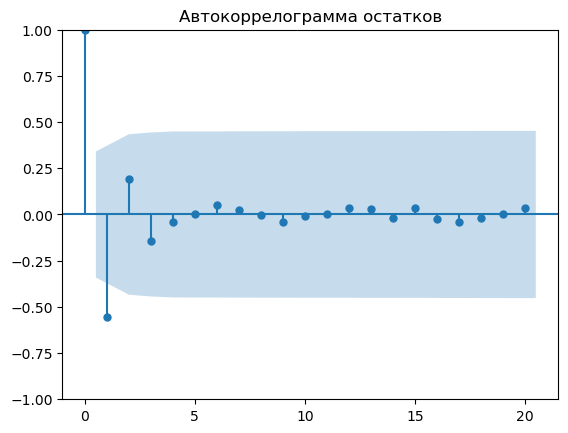

In [4]:
residuals = model.resid

graphics.tsa.plot_acf(residuals, lags=20)
plt.title("Автокоррелограмма остатков")
plt.show()


### Метод рядов

Метод рядов (или тест серий) — это статистический тест, который проверяет случайность последовательности данных, таких как остатки модели. Этот тест определяет, есть ли в последовательности какие-то паттерны, что может указывать на автокорреляцию.

#### Основная идея метода рядов
Метод рядов анализирует последовательность знаков (положительных и отрицательных) остатков модели, определяя так называемые **ряды**. Ряд — это последовательность положительных или отрицательных остатков, которая заканчивается, когда знак остатка меняется. Если остатки действительно случайны и независимы, то количество таких рядов в последовательности будет приближаться к случайному значению, определяемому теорией вероятностей.

#### Как работает метод рядов?
1. **Определение рядов**: Последовательность остатков разделяется на ряды, которые представляют собой непрерывные участки положительных или отрицательных значений. Например, если последовательность остатков выглядит так: `[+, +, -, -, +, -]`, то в ней 4 ряда (2 положительных и 2 отрицательных).

2. **Подсчет числа рядов**: Подсчитывается общее количество рядов и количество положительных и отрицательных остатков.

3. **Проверка случайности**: На основе числа положительных и отрицательных рядов можно вычислить ожидаемое количество рядов при условии, что остатки независимы. Затем сравнивается фактическое количество рядов с ожидаемым. 

4. **Выводы**: Если фактическое количество рядов значительно отличается от ожидаемого, можно предположить, что остатки не случайны и в них присутствует автокорреляция.

#### Формула метода рядов
Для последовательности длиной $ N $ с $ N_+ $ положительными и $ N_- $ отрицательными значениями, ожидаемое количество рядов $ E(R) $ вычисляется как:
$
E(R) = \frac{2N_+N_-}{N} + 1
$
Дисперсия количества рядов $ \text{Var}(R) $ рассчитывается как:
$
\text{Var}(R) = \frac{2N_+N_-(2N_+N_- - N)}{N^2(N - 1)}
$
Для проверки гипотезы используется нормализированная статистика:
$
Z = \frac{R - E(R)}{\sqrt{\text{Var}(R)}}
$
Если $ |Z| $ больше критического значения нормального распределения (например, 1.96 при уровне значимости 0,05), гипотеза о случайности отклоняется.

#### Интерпретация
- Если гипотеза о случайности **отклоняется**, это говорит о наличии автокорреляции в остатках.
- Если гипотеза о случайности **не отклоняется**, можно считать, что остатки случайны и независимы.

Метод рядов помогает быстро оценить, нарушено ли предположение о случайности остатков, что может указывать на недостатки модели или необходимость ее уточнения.

In [5]:
from scipy.stats import norm

# Остатки модели
residuals = model.resid

# Определение знаков
signs = np.sign(residuals)

# Подсчет положительных и отрицательных остатков
N_plus = np.sum(signs > 0)
N_minus = np.sum(signs < 0)
N = N_plus + N_minus

# Подсчет числа рядов
runs = 1 + np.sum(signs[1:] != signs[:-1])

# Ожидаемое количество рядов и дисперсия
E_R = (2 * N_plus * N_minus) / N + 1
Var_R = (2 * N_plus * N_minus * (2 * N_plus * N_minus - N)) / (N**2 * (N - 1))

# Статистика Z
Z = (runs - E_R) / np.sqrt(Var_R)

# Проверка гипотезы
alpha = 0.05
critical_value = norm.ppf(1 - alpha / 2)

if abs(Z) > critical_value:
    print("Гипотеза о случайности отклоняется, присутствует автокорреляция.")
else:
    print("Гипотеза о случайности не отклоняется, автокорреляции нет.")

Гипотеза о случайности не отклоняется, автокорреляции нет.


### Критерий Дарбина-Уотсона

Критерий Дарбина-Уотсона (DW) — это статистический тест, который проверяет наличие автокорреляции первого порядка в остатках линейной регрессионной модели. Автокорреляция остатков может указывать на то, что модель не учла какую-то структуру в данных, что может снизить точность прогнозов и валидность выводов.

#### Основная идея критерия Дарбина-Уотсона
Критерий Дарбина-Уотсона определяет, насколько остатки $ e_t $ в модели связаны со значениями на предыдущих шагах $ e_{t-1} $. Если остатки модели являются случайными (без автокорреляции), их значения на разных шагах времени должны быть независимы друг от друга.

#### Формула критерия Дарбина-Уотсона
Статистика Дарбина-Уотсона $ d $ вычисляется по формуле:

$
d = \frac{\sum_{t=2}^{T} (e_t - e_{t-1})^2}{\sum_{t=1}^{T} e_t^2}
$

где:
- $ e_t $ — остаток (ошибка) модели на шаге $ t $,
- $ T $ — общее количество наблюдений.

Значение $ d $ находится в диапазоне от 0 до 4.

#### Интерпретация значения $ d $
- **Если $ d \approx 2 $**: Это означает, что автокорреляция отсутствует, остатки случайны.
- **Если $ d < 2 $**: Есть положительная автокорреляция, т.е. положительные остатки с большей вероятностью следуют за положительными, а отрицательные за отрицательными.
- **Если $ d > 2 $**: Есть отрицательная автокорреляция, когда положительные и отрицательные значения чередуются чаще, чем это было бы случайно.

#### Критические значения
Для теста на значимость используется таблица критических значений $ d_L $ и $ d_U $ (нижнего и верхнего порогов), которые зависят от числа наблюдений и количества регрессоров. Интерпретация:
- **$ d < d_L $**: Наблюдается значительная положительная автокорреляция.
- **$ d > 4 - d_L $**: Наблюдается значительная отрицательная автокорреляция.
- **$ d_U < d < 4 - d_U $**: Автокорреляции нет.
- **$ d_L \leq d \leq d_U $** или **$ 4 - d_U \leq d \leq 4 - d_L $**: Результат не определен, и требуется дополнительная проверка.


#### Пример интерпретации
1. **Если $ dw\_stat \approx 2 $**: Остатки случайны, автокорреляции нет, и модель хорошо описывает данные.
2. **Если $ dw\_stat < 2 $**: Положительная автокорреляция. Это может означать, что модель не учла какие-то временные зависимости, и можно рассмотреть модели, учитывающие структуру автокорреляции (например, авторегрессионные модели).
3. **Если $ dw\_stat > 2 $**: Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.

Критерий Дарбина-Уотсона позволяет выявить автокорреляцию в остатках модели, помогая оценить качество регрессионной модели и понять, требуется ли добавить дополнительные переменные или перестроить модель.

In [6]:
dw_stat = stats.durbin_watson(residuals)
print(f"Статистика Дарбина-Уотсона: {dw_stat}")

if dw_stat == 2:
    print('Остатки случайны, автокорреляции нет, и модель хорошо описывает данные.')
elif dw_stat < 2:
    print('Положительная автокорреляция. Это может означать, что модель не учла какие-то временные зависимости, и можно рассмотреть модели, учитывающие структуру автокорреляции (например, авторегрессионные модели)')
else:
    print('Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.')

Статистика Дарбина-Уотсона: 3.113136974542018
Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.


### Коэффициент автокорреляции

Коэффициенты автокорреляции (ACF, **Autocorrelation Function**) измеряют, насколько текущие значения временного ряда зависят от его прошлых значений на разных **лагах** (шагов смещения во времени). Они показывают степень корреляции между значениями ряда на разных временных интервалах, помогая понять наличие и характер временных зависимостей.

#### Как рассчитываются коэффициенты автокорреляции?
Для временного ряда $ y_t $ коэффициент автокорреляции на лаге $ k $ ($ \rho_k $) можно рассчитать следующим образом:

$
\rho_k = \frac{\sum_{t=k+1}^{T} (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}
$

где:
- $ y_t $ — значение временного ряда в момент времени $ t $,
- $ \bar{y} $ — среднее значение временного ряда,
- $ T $ — общее количество наблюдений,
- $ k $ — лаг.

#### Интерпретация коэффициентов автокорреляции
1. **Если $ \rho_k \approx 0 $** на всех лагах $ k $, это говорит о том, что значения временного ряда не зависят от предыдущих значений, и остатки случайны. Такой временной ряд не содержит автокорреляции.
   
2. **Если $ \rho_k > 0 $** на малых значениях $ k $ (например, $ k = 1, 2, 3 $), то в данных присутствует **положительная автокорреляция**. Это означает, что высокие значения ряда (например, большие остатки) с большей вероятностью следуют за высокими значениями, а низкие значения — за низкими.

3. **Если $ \rho_k < 0 $** на малых значениях $ k $, это указывает на **отрицательную автокорреляцию**, когда значения временного ряда чередуются — высокое значение имеет тенденцию следовать за низким, и наоборот.

4. **Постепенное затухание автокорреляции** (медленное снижение значений $ \rho_k $) на больших лагах может свидетельствовать о наличии долгосрочной структуры или сезонности в данных.



#### Как использовать ACF на практике?
1. **Оценка случайности остатков**: Если остатки модели не автокоррелированы, большинство значений ACF для остатков будут находиться внутри доверительных интервалов.
  
2. **Выбор модели временного ряда**: ACF помогает определить подходящую модель для анализа временных рядов. Например:
   - Если автокорреляция значима только на первом лаге, можно рассмотреть модель AR(1).
   - Если автокорреляция затухает медленно, возможны сложные модели, такие как ARIMA.

3. **Выявление сезонности**: Если наблюдаются пики автокорреляции через регулярные интервалы, это может указывать на сезонность.

Коэффициенты автокорреляции являются важным инструментом в анализе временных рядов, позволяя глубже понять их структуру и выявить возможные временные зависимости.

In [7]:
acf_values = tsa.acf(residuals, fft=False)
print("Коэффициенты автокорреляции (ACF):", acf_values)

Коэффициенты автокорреляции (ACF): [ 1.00000000e+00 -5.56580577e-01  1.90015721e-01 -1.42213720e-01
 -4.25729145e-02 -9.50581422e-05  4.92299788e-02  2.64304219e-02
 -5.01816572e-03 -4.20594376e-02 -6.76395648e-03  2.44650998e-03
  3.24388298e-02  2.85135661e-02 -2.17563514e-02  3.52110148e-02]


Чтобы интерпретировать этот ряд коэффициентов автокорреляции (ACF), нужно рассмотреть значения автокорреляций на каждом лаге и понять, есть ли какие-то значимые паттерны, указывающие на структуру временных зависимостей в данных.

#### Интерпретация коэффициентов автокорреляции:
1. **Лаг 0**: Коэффициент автокорреляции равен 1.0, так как это корреляция ряда с самим собой. Это значение всегда равно 1 и используется в качестве отправной точки для сравнения следующих лагов.

2. **Лаг 1**: Коэффициент автокорреляции составляет $-0.556$. Значительное отрицательное значение на первом лаге указывает на сильную **отрицательную автокорреляцию**. Это означает, что значения временного ряда имеют тенденцию чередоваться: высокие значения следуют за низкими, и наоборот. Такая структура автокорреляции характерна для данных, в которых присутствует "чередование" значений.

3. **Лаги 2–3**: Коэффициенты $0.190$ и $-0.142$ показывают некоторую слабую положительную и отрицательную автокорреляцию на втором и третьем лагах. Это может указывать на краткосрочные паттерны или на то, что влияние автокорреляции быстро затухает после первого лага.

4. **Лаги 4 и далее**: Коэффициенты на этих лагах имеют низкие значения (менее $\pm0.05$) и близки к нулю. Это говорит о том, что на этих лагах нет значимой автокорреляции, и временная зависимость между значениями ряда после третьего лага практически отсутствует.

5. **Небольшие колебания на больших лагах**: Некоторые лаги имеют небольшие значения автокорреляции, как, например, $0.049$ на шестом лаге и $0.035$ на 15-м лаге. Такие значения в пределах доверительного интервала, вероятно, не значимы и могут быть случайными. В целом, это свидетельствует о том, что временная зависимость в остатках после третьего лага отсутствует.

#### Итоговая интерпретация:
- **Основная автокорреляция** в этом ряду сосредоточена на первом лаге с сильным отрицательным значением, что указывает на чередование значений. Возможно, моделью не учтена какая-то структура, которая приводит к такой автокорреляции.
- **Быстрое затухание автокорреляции после первых нескольких лагов** говорит о том, что зависимость между значениями временного ряда исчезает довольно быстро.

## 3.  Построить авторересионную схему 1-ого порядка AR(1) (определив коэффициент авторегрессии с помощью: Дарбина-Уотсона, методами: Кохрейна-Оркатта, Хилдрета -Лу)

### Метод Хилдрета-Лу

Метод Хилдрета-Лу — это один из способов корректировки регрессионной модели, если в её остатках присутствует автокорреляция первого порядка. Этот метод, в отличие от метода Кохрейна-Оркатта, не является итерационным, а представляет собой метод подбора параметра автокорреляции $\rho$ для корректировки модели.

#### Основная идея метода Хилдрета-Лу
Метод Хилдрета-Лу заключается в том, чтобы перебором найти такое значение параметра $\rho$, которое минимизирует сумму квадратов преобразованных остатков. Метод используется для устранения автокорреляции первого порядка, когда она выражается через авторегрессионное уравнение:

$
e_t = \rho e_{t-1} + u_t
$

где $ e_t $ — остаток модели в момент времени $ t $, $ \rho $ — коэффициент автокорреляции, который подбирается, и $ u_t $ — белый шум.

#### Пошаговый алгоритм метода Хилдрета-Лу

1. **Выбор диапазона значений для $\rho$**: Определяется диапазон возможных значений для $\rho$, например от -1 до 1, с шагом (например, 0.01 или 0.05).

2. **Трансформация данных**: Для каждого значения $\rho$ в этом диапазоне преобразовывают зависимую переменную $ Y_t $ и независимые переменные $ X_t $ по следующей схеме:
   - $ Y_t' = Y_t - \rho Y_{t-1} $
   - $ X_t' = X_t - \rho X_{t-1} $
   
3. **Построение регрессии на преобразованных данных**: Оценивается регрессия для каждой пары $ Y_t' $ и $ X_t' $ для каждого значения $\rho$ в выбранном диапазоне. На каждом шаге сохраняется сумма квадратов остатков.

4. **Выбор оптимального $\rho$**: Оптимальным значением $\rho$ считается то, которое минимизирует сумму квадратов преобразованных остатков.

5. **Окончательная оценка модели**: После определения оптимального значения $\rho$ выполняется окончательная оценка регрессионной модели с применением найденного коэффициента автокорреляции.


#### Преимущества и недостатки метода Хилдрета-Лу

- **Преимущества**:
  - Простота реализации, поскольку не требует итераций после нахождения оптимального $\rho$.
  - Подходит для моделей, где автокорреляция первого порядка выражена, и есть уверенность в выборе диапазона значений $\rho$.

- **Недостатки**:
  - Зависимость от выбора диапазона $\rho$: если диапазон выбран неправильно, решение может оказаться неэффективным.
  - Метод предполагает линейную автокорреляцию только первого порядка и может оказаться менее точным, если данные имеют более сложные временные зависимости.

#### Заключение
Метод Хилдрета-Лу — это простой и понятный способ устранения автокорреляции первого порядка. Он подходит для моделей, где предположение об автокорреляции первого порядка обосновано. Однако точность метода сильно зависит от выбора диапазона и шага изменения $\rho$, что может потребовать дополнительных проверок на практике.

In [8]:
X = model.model.exog
Y = model.model.endog

# Задаем диапазон значений для rho
rho_values = np.arange(-1, 1, 0.01)
best_rho = None
min_rss = float('inf')

# Перебор значений rho
for rho in rho_values:
    # Преобразуем данные
    Y_transformed = Y[1:] - rho * Y[:-1]
    X_transformed = X[1:] - rho * X[:-1]
    
    # Строим регрессию на преобразованных данных
    model1 = OLS(Y_transformed, X_transformed).fit()
    rss = sum(model1.resid**2)  # Сумма квадратов остатков
    
    # Проверка, минимизирует ли текущее rho сумму квадратов остатков
    if rss < min_rss:
        min_rss = rss
        best_rho = rho

# Окончательная оценка модели с оптимальным значением rho
Y_transformed = Y[1:] - best_rho * Y[:-1]
X_transformed = X[1:] - best_rho * X[:-1]
final_model = OLS(Y_transformed, X_transformed).fit()


print("Оптимальное значение rho:", best_rho)
print("Модель со схемой AR(1):", final_model.summary())

Оптимальное значение rho: -0.5699999999999996
Модель со схемой AR(1):                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.84e-17
Time:                        11:59:31   Log-Likelihood:                 10.337
No. Observations:                  32   AIC:                             1.326
Df Residuals:                      21   BIC:                             17.45
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Оптимальное значение $\rho = -0.57$, полученное по методу Хилдрета-Лу, указывает на **отрицательную автокорреляцию** остатков в регрессионной модели. Это означает, что если остаток в одном периоде высок, то в следующем он, вероятно, будет низким, и наоборот. Такая чередующаяся зависимость между остатками свидетельствует о том, что в данных присутствует цикличность или "отскакивающий" паттерн, когда изменения в одну сторону сменяются изменениями в противоположную сторону.

#### Выводы и интерпретация
1. **Чередующаяся зависимость**: Отрицательная автокорреляция (-0.57) говорит о том, что в остатках присутствует заметная чередующаяся зависимость. Это часто встречается в данных с сезонными или цикличными паттернами, где наблюдаются регулярные изменения, которые "сглаживают" друг друга.

2. **Эффективность корректировки**: Теперь, с учетом найденного значения $\rho$, модель скорректирована таким образом, чтобы устранить автокорреляцию остатков первого порядка. Это должно повысить надежность коэффициентов регрессии, так как больше не будет систематической зависимости в остатках, что устраняет одну из потенциальных проблем модели.

3. **Рекомендации**: Отрицательная автокорреляция в остатках может сигнализировать о недоучтенных сезонных эффектах или других временных факторах. Если это применимо к данным, стоит рассмотреть добавление переменных, отражающих сезонные или временные колебания, чтобы дополнительно повысить точность модели.

### Метод Кохрейна-Оркатта

Метод Кохрейна-Оркатта — это итерационный метод, который применяется для устранения автокорреляции первого порядка в регрессионных моделях. Он используется, когда остатки модели демонстрируют положительную автокорреляцию, и позволяет скорректировать параметры модели, чтобы сделать её более точной и избавить от автокорреляции.

#### Основная идея метода Кохрейна-Оркатта
Метод Кохрейна-Оркатта заключается в преобразовании исходной модели так, чтобы устранить автокорреляцию в остатках. Он предполагает, что остатки модели $ e_t $ связаны по схеме авторегрессии первого порядка (AR(1)):

$
e_t = \rho e_{t-1} + u_t
$

где:
- $ \rho $ — коэффициент автокорреляции, который нужно оценить,
- $ u_t $ — белый шум, который является случайным и независимым от предыдущих значений.

Метод Кохрейна-Оркатта трансформирует исходные уравнения регрессии таким образом, чтобы устранить автокорреляцию остатков.

#### Пошаговый алгоритм метода Кохрейна-Оркатта

1. **Оценка исходной модели**: Построить исходную регрессионную модель и рассчитать коэффициент автокорреляции первого порядка $ \rho $ с помощью, например, критерия Дарбина-Уотсона или автокоррелограммы.

2. **Трансформация переменных**: Применить следующую трансформацию к каждому уравнению модели:
   - Для зависимой переменной $ Y_t $: $ Y_t' = Y_t - \rho Y_{t-1} $
   - Для каждой независимой переменной $ X_t $: $ X_t' = X_t - \rho X_{t-1} $
   
   В результате получается уравнение для преобразованных переменных:
   
   $
   Y_t' = \beta_0 (1 - \rho) + \beta_1 X_t' + \varepsilon_t'
   $

3. **Переоценка модели**: Построить регрессионную модель на основе преобразованных переменных $ Y_t' $ и $ X_t' $ и найти новые оценки коэффициентов.

4. **Итерация**: Пересчитать коэффициент автокорреляции $ \rho $ на основе новых остатков и повторить шаги 2 и 3, пока значения коэффициентов не перестанут значительно изменяться.

#### Преимущества и недостатки метода Кохрейна-Оркатта
- **Преимущества**:
  - Позволяет избавиться от автокорреляции первого порядка, улучшая точность модели.
  - Метод прост в реализации и подходит для небольших наборов данных с автокорреляцией первого порядка.

- **Недостатки**:
  - Требует многократных итераций, которые могут быть ресурсоемкими.
  - Если автокорреляция в данных не ограничивается первым порядком, метод может быть менее эффективен.

#### Заключение
Метод Кохрейна-Оркатта помогает эффективно скорректировать модель, если в данных присутствует автокорреляция первого порядка. Благодаря итеративной процедуре и трансформации переменных метод устраняет временную зависимость остатков, делая модель более корректной.

In [9]:
r = 1 - dw_stat/2

X = model.model.exog
Y = model.model.endog

model1 = OLS(Y, X).fit()
residuals = model1.resid

# Шаг 2: Оценка коэффициента автокорреляции
rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]

# Итерационный процесс
for _ in range(10):  # Максимум 10 итераций, можно остановиться раньше, если разница мала
    Y_transformed = Y[1:] - rho * Y[:-1]
    X_transformed = X[1:] - rho * X[:-1]

    # Переоценка модели на преобразованных данных
    model1 = OLS(Y_transformed, X_transformed).fit()
    residuals = model1.resid

    # Обновляем rho и проверяем условие остановки
    new_rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]
    if abs(new_rho - rho) < 1e-5:  # Условие остановки
        break
    rho = new_rho

print("Коэффициент автокорреляции rho:", rho)
print("Модель со схемой AR(1):", final_model.summary())

Коэффициент автокорреляции rho: -0.42414789487160603
Модель со схемой AR(1):                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.84e-17
Time:                        11:59:31   Log-Likelihood:                 10.337
No. Observations:                  32   AIC:                             1.326
Df Residuals:                      21   BIC:                             17.45
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Коэффициент автокорреляции $\rho = -0.424$, полученный по методу Кохрейна-Оркатта, также указывает на **отрицательную автокорреляцию** в остатках модели, но с меньшей величиной автокорреляции по сравнению с предыдущим результатом (-0.57 по методу Хилдрета-Лу).

#### Выводы и интерпретация:

1. **Отрицательная автокорреляция**: Значение $\rho = -0.424$ подтверждает, что остатки модели имеют отрицательную автокорреляцию. Это означает, что высокие значения остатков с большой вероятностью будут следовать за низкими значениями и наоборот. Такая динамика может свидетельствовать о наличии цикличных или колеблющихся паттернов в данных.

2. **Сравнение с методом Хилдрета-Лу**: Полученное значение $\rho$ по методу Кохрейна-Оркатта ($-0.424$) несколько меньше, чем по методу Хилдрета-Лу ($-0.57$). Это может означать, что подходы к оценке автокорреляции дали немного разные результаты, что является нормальной ситуацией в эконометрике, поскольку оба метода имеют свои особенности и нюансы.

3. **Корректировка модели**: В обоих случаях, с учетом автокорреляции в остатках, корректировка модели (например, с использованием авторегрессионных моделей или модели ARIMA) будет полезной для улучшения точности предсказаний. 

4. **Уровень автокорреляции**: Значение $\rho = -0.424$ не слишком велико, но оно указывает на заметную автокорреляцию, которую стоит учитывать при дальнейшей обработке данных. Это значение подтверждает, что в данных есть некоторый циклический характер, но автокорреляция достаточно умеренная.


Таким образом, коэффициент $\rho = -0.424$ подтверждает наличие отрицательной автокорреляции в данных, и для повышения точности модели стоит рассматривать корректировки и учет этих временных зависимостей.